# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset
import statsmodels.api as sm

# ch3. 데이터 탐색하기

## 3.1. 시계열 데이터 주요 형태

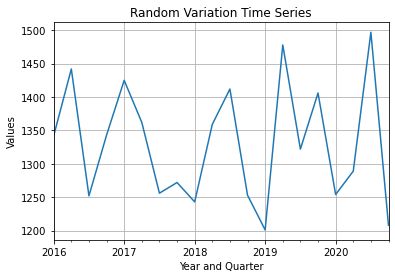

In [2]:
'''
    - 우연변동 시계열
    ex. 주기를 타지 않는 제품의 생산량, 판매량 데이터, 짧은 기간의 주가 데이터, 금리 등
'''
data = np.array([1342, 1442, 1252, 1343,
                 1425, 1362, 1256, 1272,
                 1243, 1359, 1412, 1253,
                 1201, 1478, 1322, 1406,
                 1254, 1289, 1497, 1208]).reshape(5, 4)

# pandas DataFrame으로 변환
df = pd.DataFrame(data, columns=['Q1', 'Q2', 'Q3', 'Q4'])

# 시작년도와 분기를 설정
start_year = 2016
years = [start_year + i for i in range(df.shape[0])]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# 날짜 인덱스 생성
date_index = pd.PeriodIndex([f"{year}Q{q}" for year in years for q in range(1, 5)], freq='Q')

# 시계열 데이터로 변환
ts = pd.Series(data.flatten(), index=date_index)

ts.plot(title='Random Variation Time Series')

plt.xlabel('Year and Quarter')
plt.ylabel('Values')

plt.grid(True)

plt.show()

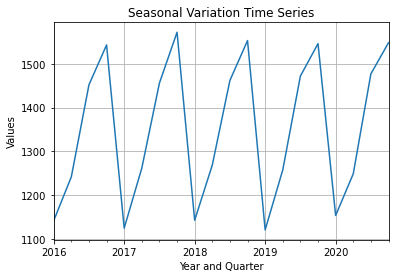

In [3]:
'''
    - 계절변동 시계열
    ex. 강수량, 적설량, 아이스크림 판매 추이, 전력 소비량, 성숙한 플랫폼의 데일리 트래픽 등
'''
data = np.array([1142, 1242, 1452, 1543,
                1125, 1262, 1456, 1572,
                1143, 1269, 1462, 1553,
                1121, 1258, 1472, 1546,
                1154, 1249, 1477, 1548]).reshape(5, 4)

# 시작년도와 분기를 설정
start_year = 2016
years = [start_year + i for i in range(df.shape[0])]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# 날짜 인덱스 생성
date_index = pd.PeriodIndex([f"{year}Q{q}" for year in years for q in range(1, 5)], freq='Q')

# 시계열 데이터로 변환
ts = pd.Series(data.flatten(), index=date_index)

ts.plot(title='Seasonal Variation Time Series')

plt.xlabel('Year and Quarter')
plt.ylabel('Values')

plt.grid(True)

plt.show()

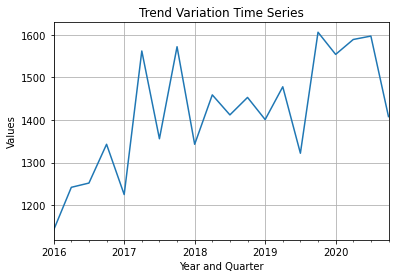

In [4]:
'''
    - 추세변동 시계열
    - 보통 시계열의 최저점을 많이 봄
    - 전체적으로 우상향했는지, 하향했는지 봄
    ex. 물가 데이터, 희소 원자재 가격 데이터, 대부분의 주가지수 데이터
'''
data = np.array([1142, 1242, 1252, 1343,
                1225, 1562, 1356, 1572,
                1343, 1459, 1412, 1453,
                1401, 1478, 1322, 1606,
                1554, 1589, 1597, 1408]).reshape(5, 4)

# 시작년도와 분기를 설정
start_year = 2016
years = [start_year + i for i in range(df.shape[0])]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# 날짜 인덱스 생성
date_index = pd.PeriodIndex([f"{year}Q{q}" for year in years for q in range(1, 5)], freq='Q')

# 시계열 데이터로 변환
ts = pd.Series(data.flatten(), index=date_index)

ts.plot(title='Trend Variation Time Series')

plt.xlabel('Year and Quarter')
plt.ylabel('Values')

plt.grid(True)

plt.show()

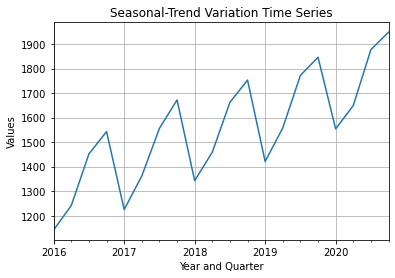

In [5]:
'''
    - 계절적 추세변동 시계열
'''
data = np.array([1142, 1242, 1452, 1543,
                1225, 1362, 1556, 1672,
                1343, 1459, 1662, 1753,
                1421, 1558, 1772, 1846,
                1554, 1649, 1877, 1948]).reshape(5, 4)

# 시작년도와 분기를 설정
start_year = 2016
years = [start_year + i for i in range(df.shape[0])]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# 날짜 인덱스 생성
date_index = pd.PeriodIndex([f"{year}Q{q}" for year in years for q in range(1, 5)], freq='Q')

# 시계열 데이터로 변환
ts = pd.Series(data.flatten(), index=date_index)

ts.plot(title='Seasonal-Trend Variation Time Series')

plt.xlabel('Year and Quarter')
plt.ylabel('Values')

plt.grid(True)

plt.show()

## 3.2. 시계열 데이터 시각화

In [6]:
def plot_quarterly_graph(data):

    # pandas DataFrame으로 변환
    df = pd.DataFrame(data, columns=['Q1', 'Q2', 'Q3', 'Q4'])

    # 분기별 평균 계산
    quarterly_averages = df.mean()

    # 그래프 그리기
    fig, axs = plt.subplots(1, 4, figsize=(10, 8), sharex=True)

    for i, quarter in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
        axs[i].plot(df.index, df[quarter], marker='o', linestyle='-')
        axs[i].hlines(quarterly_averages[quarter], xmin=0, xmax=4, color='red', linestyle='--')
        axs[i].set_title(quarter)
        axs[i].grid(True)

    fig.suptitle('EDA: Variation Series')
    fig.text(0.5, 0.04, 'Quarter: 2016-2020', ha='center')
    fig.text(0.04, 0.5, 'Sales', va='center', rotation='vertical')

    plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

    plt.show()

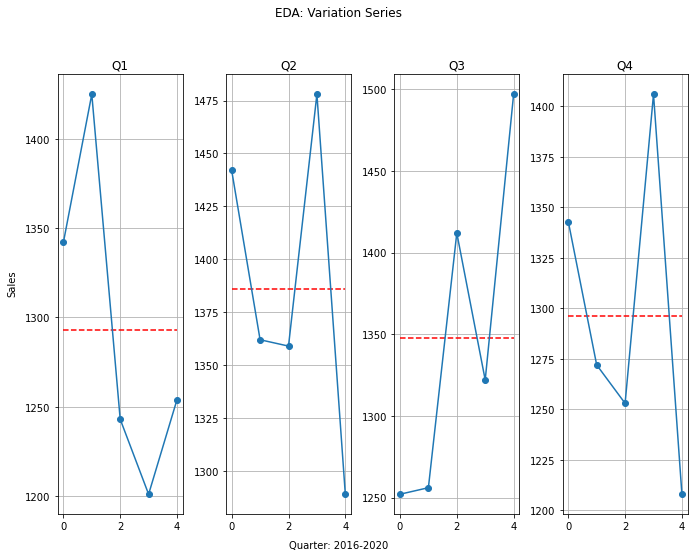

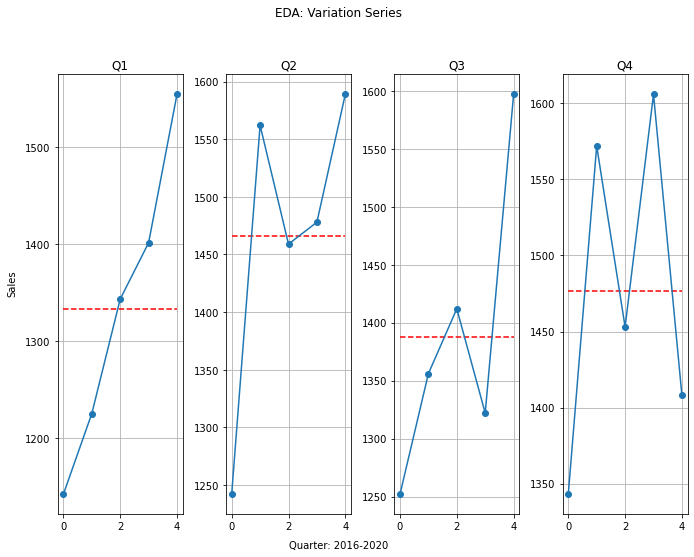

In [7]:
# 데이터 생성
random_data = np.array([1342, 1442, 1252, 1343,
                        1425, 1362, 1256, 1272,
                        1243, 1359, 1412, 1253,
                        1201, 1478, 1322, 1406,
                        1254, 1289, 1497, 1208]).reshape(5, 4)

trend_data = np.array([1142, 1242, 1252, 1343,
                       1225, 1562, 1356, 1572,
                       1343, 1459, 1412, 1453,
                       1401, 1478, 1322, 1606,
                       1554, 1589, 1597, 1408]).reshape(5, 4)

for data in [random_data, trend_data]:
    plot_quarterly_graph(data)

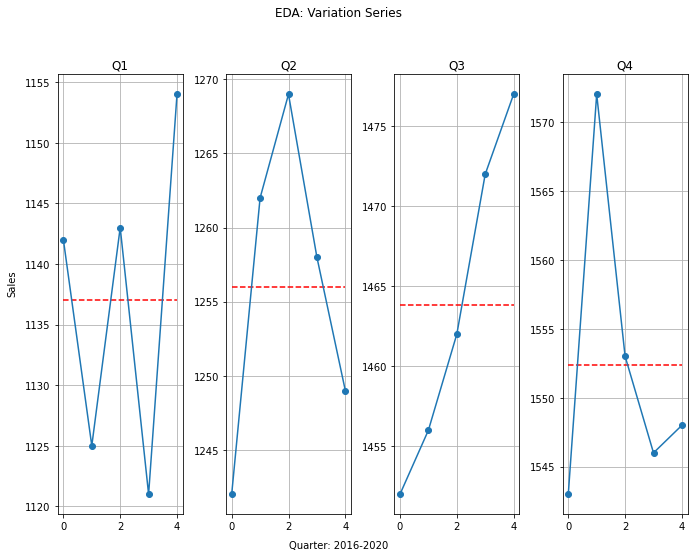

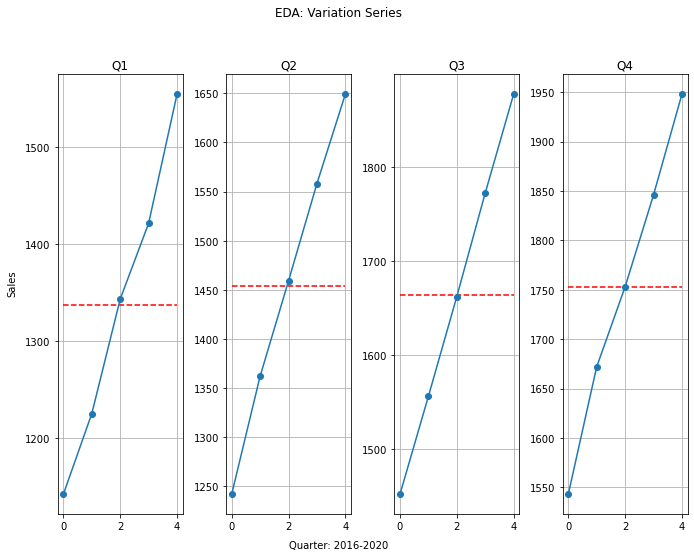

In [8]:
'''
    - seasonal의 경우, 분기별로 각각 봤을 때, 값의 변동폭이 크지 않음
    - 모델링 시, 아래 형태의 시계열은 전처리가 필요함
'''
seasonal_data = np.array([1142, 1242, 1452, 1543,
                1125, 1262, 1456, 1572,
                1143, 1269, 1462, 1553,
                1121, 1258, 1472, 1546,
                1154, 1249, 1477, 1548]).reshape(5, 4)

seasonal_trend_data = np.array([1142, 1242, 1452, 1543,
                1225, 1362, 1556, 1672,
                1343, 1459, 1662, 1753,
                1421, 1558, 1772, 1846,
                1554, 1649, 1877, 1948]).reshape(5, 4)

for data in [seasonal_data, seasonal_trend_data]:
    plot_quarterly_graph(data)

# ch4. 시계열 데이터와 친해지기

* 차분
    *  시차(lag) -> 특정한 활동이 영향을 주었다 (yt-1) -> (yt): 1만큼의 시간이 걸림 (lag=1)
    *  원유 생산량 감축에 대한 뉴스 (6/1) -> 원유 관련 주가 가격 상승 (6/2): lag 1일

* 역차분
    * 모델링 시, 입력값에는 차분한 시계열 데이터 들어감
    * 모델 출력 값 결과 해석 시, 역차분하여 다시 복원

* 시계열 합집합
    * 동일한 시기에 서로 다른 두 상품의 시계열 데이터를 펼쳐서 같이 보고 싶을 때 사용됨

* 시계열 통합
    * aggregate는 summary statistic (요약통계량)을 뜻함
        * 평균 (1st moment)
        * 분산
        * 중간값 (median), 최빈값 (mode), 최솟값 (min), 최댓값 (max)

In [9]:
data = np.array([1342, 1442, 1252, 1343,
                 1425, 1362, 1256, 1272,
                 1243, 1359, 1412, 1253,
                 1201, 1478, 1322, 1406,
                 1254, 1289, 1497, 1208]).reshape(5, 4)

# pandas DataFrame으로 변환
df = pd.DataFrame(data, columns=['Q1', 'Q2', 'Q3', 'Q4'], index=[2016, 2017, 2018, 2019, 2020])

# 시작년도와 분기를 설정
start_year = 2016
years = [start_year + i for i in range(df.shape[0])]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# 날짜 인덱스 생성
date_index = pd.PeriodIndex([f"{year}Q{q}" for year in years for q in range(1, 5)], freq='Q')

# 시계열 데이터로 변환
sample_df = pd.DataFrame(data.flatten(), index=date_index, columns=['Value'])

sample_df

,Value
2016Q1,1342
2016Q2,1442
2016Q3,1252
2016Q4,1343
2017Q1,1425
2017Q2,1362
2017Q3,1256
2017Q4,1272
2018Q1,1243
2018Q2,1359


In [10]:
# 1차 차분
# 해당 차분 값을 이용하여 모델링 가능
sample_df.diff()

,Value
2016Q1,NaN
2016Q2,100.0
2016Q3,-190.0
2016Q4,91.0
2017Q1,82.0
2017Q2,-63.0
2017Q3,-106.0
2017Q4,16.0
2018Q1,-29.0
2018Q2,116.0


In [11]:
# 2차 차분
sample_df.diff(2)

,Value
2016Q1,NaN
2016Q2,NaN
2016Q3,-90.0
2016Q4,-99.0
2017Q1,173.0
2017Q2,19.0
2017Q3,-169.0
2017Q4,-90.0
2018Q1,-13.0
2018Q2,87.0


In [12]:
# 역차분
# 모델링 이후 결과 값을 다시 원래의 값으로 복원하기 위해 사용
initial_value = sample_df['Value']
sample_df_diff = sample_df.diff()

# 시계열 초기 값 + 1차 차분한 결과 누적합
sample_df['DiffInv_Value'] = sample_df['Value'].iloc[0] + sample_df_diff['Value'].cumsum()
sample_df.iloc[0, 1] = sample_df['Value'].iloc[0]

sample_df

,Value,DiffInv_Value
2016Q1,1342,1342.0
2016Q2,1442,1442.0
2016Q3,1252,1252.0
2016Q4,1343,1343.0
2017Q1,1425,1425.0
2017Q2,1362,1362.0
2017Q3,1256,1256.0
2017Q4,1272,1272.0
2018Q1,1243,1243.0
2018Q2,1359,1359.0


In [13]:
# 시계열 합집합
# prod1 생성
data1 = np.arange(1, 25).reshape(8, 3, order='F')  # 1부터 24까지의 숫자를 8x3 행렬로 변환
index1 = pd.date_range(start='2019-01-01', periods=8, freq='Q').to_period('Q').strftime('%Y Q%q') # 2019년 1분기부터 시작하는 분기별 날짜 인덱스 생성
prod1 = pd.DataFrame(data1, index=index1, columns=['web', 'app', 'hyb'])  # DataFrame 생성

# prod2 생성
data2 = np.arange(11, 23).reshape(4, 3, order='F')  # 11부터 22까지의 숫자를 4x3 행렬로 변환
index2 = pd.date_range(start='2020-01-01', periods=4, freq='Q').to_period('Q').strftime('%Y Q%q')  # 2020년 1분기부터 시작하는 분기별 날짜 인덱스 생성
prod2 = pd.DataFrame(data2, index=index2, columns=['web', 'app', 'hyb'])  # DataFrame 생성

# 결과 출력
print("prod1:")
print(prod1)
print("\nprod2:")
print(prod2)

union_df = pd.merge(prod1, prod2, left_index=True, right_index=True, how='outer', suffixes=('_prod1', '_prod2'))
union_df

prod1:
         web  app  hyb
2019 Q1    1    9   17
2019 Q2    2   10   18
2019 Q3    3   11   19
2019 Q4    4   12   20
2020 Q1    5   13   21
2020 Q2    6   14   22
2020 Q3    7   15   23
2020 Q4    8   16   24

prod2:
         web  app  hyb
2020 Q1   11   15   19
2020 Q2   12   16   20
2020 Q3   13   17   21
2020 Q4   14   18   22


,web_prod1,app_prod1,hyb_prod1,web_prod2,app_prod2,hyb_prod2
2019 Q1,1,9,17,NaN,NaN,NaN
2019 Q2,2,10,18,NaN,NaN,NaN
2019 Q3,3,11,19,NaN,NaN,NaN
2019 Q4,4,12,20,NaN,NaN,NaN
2020 Q1,5,13,21,11.0,15.0,19.0
2020 Q2,6,14,22,12.0,16.0,20.0
2020 Q3,7,15,23,13.0,17.0,21.0
2020 Q4,8,16,24,14.0,18.0,22.0


In [14]:
# 시계열 교집합
intersection_df = pd.merge(prod1, prod2, left_index=True, right_index=True, how='inner', suffixes=('_prod1', '_prod2'))
intersection_df

,web_prod1,app_prod1,hyb_prod1,web_prod2,app_prod2,hyb_prod2
2020 Q1,5,13,21,11,15,19
2020 Q2,6,14,22,12,16,20
2020 Q3,7,15,23,13,17,21
2020 Q4,8,16,24,14,18,22


In [15]:
# 시계열 부분추출 및 수정
# 필요한 기간 데이터만 추출
prod1.loc[['2019 Q3', '2020 Q3'], :]

,web,app,hyb
2019 Q3,3,11,19
2020 Q3,7,15,23


In [16]:
# 시계열 통합
# 기간 별 groupby 집계라고 생각하면 됨
prod1_reset = prod1.reset_index()
prod1_reset['year'] = prod1_reset['index'].map(lambda x: x[:4])

prod1_reset.groupby('year').mean()

,web,app,hyb
year,,,
2019,2.5,10.5,18.5
2020,6.5,14.5,22.5


# ch5. 시계열 데이터의 EDA
* 상태-공간 모형 (state-space model)
    1. 과거 데이터를 이용하여 현재값, 미래값 추측

* 상태 공간 모형을 사용하는 것은 기존의 예측 문제와 더불어 현재 혹은 상태 변수 값을 추정하는 것을 목표로 한다는 것을 뜻함
* 대표적으로 필터링 문제와 스무딩 문제 존재

Yj = {y1, y2, ..., yj} --> State Space Model --> xt 추정

* j < t --> Prediction
* j = t --> Filter
* j > t --> Smoothing

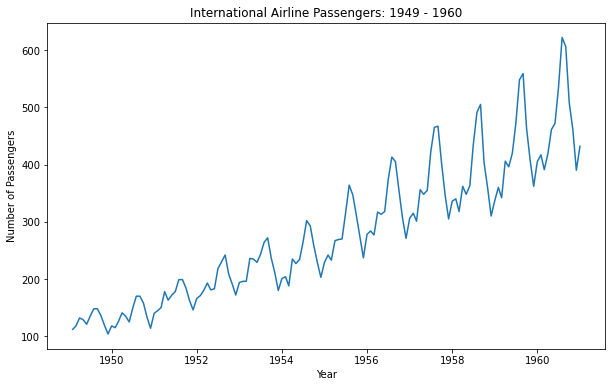

In [17]:
# 데이터 로드
data = sm.datasets.get_rdataset("AirPassengers").data

# 'time' 열을 datetime 형식으로 변환하고 인덱스로 설정
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'])

plt.title('International Airline Passengers: 1949 - 1960')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

plt.show()

## 5.1 평활화 (Smoothing)
* 필터링(filtering) 문제는 현재까지 수집한 관측치 y1,⋯,yt 를 이용해서 현재의 상태 변수 값 xt 을 추정하는 문제이다. 칼만 필터는 컴퓨터 비전, 로봇 공학, 레이다 등의 여러 분야에 사용된다. 칼만 필터는 과거에 수행한 측정값을 바탕으로 현재의 상태 변수의 결합분포를 추정한다.

* 시계열 자료에서 무작위성을 줄이는 기법
* 평활화 개념에 Filter를 포함하기도 함

1. 이동평균 평활법 (Moving Average, MA Smoothing)
2. 지수 평활법 (Exponential Smoothing): 단순 지수평활, 이중 지수평활
3. OLS Smoothing (회귀모형 평활법)
4. Holt-Winters Smoothing
5. Kernel Smoothing

In [18]:
import statsmodels.api as sm
import pandas as pd

# 데이터 로드
data = sm.datasets.get_rdataset("AirPassengers").data

# 'time' 열을 datetime 형식으로 변환하고 인덱스로 설정
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)

# 3개월 이동 평균 계산
data['MA3'] = data['value'].rolling(window=3).mean()

# 6개월 이동 평균 계산
data['MA6'] = data['value'].rolling(window=6).mean()

# 12개월 이동 평균 계산
data['MA12'] = data['value'].rolling(window=12).mean()

data

,value,MA3,MA6,MA12
time,,,,
1949-01-31,112,NaN,NaN,NaN
1949-02-28,118,NaN,NaN,NaN
1949-03-31,132,120.666667,NaN,NaN
1949-04-30,129,126.333333,NaN,NaN
1949-05-31,121,127.333333,NaN,NaN
...,...,...,...,...
1960-08-31,606,587.666667,519.166667,463.333333
1960-09-30,508,578.666667,534.000000,467.083333
1960-10-31,461,525.000000,534.000000,471.583333


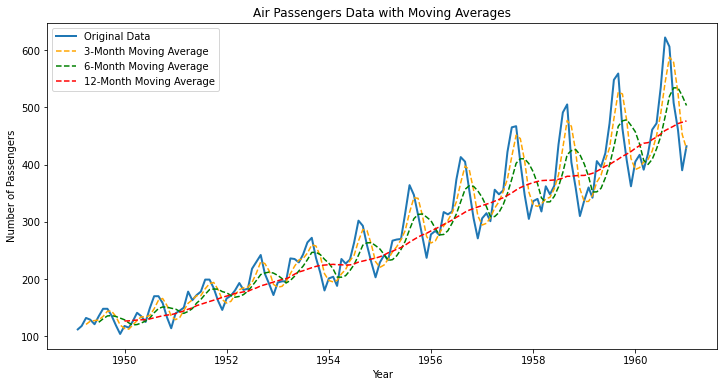

In [19]:
# 그래프 그리기
plt.figure(figsize=(12, 6))

# 원본 데이터
plt.plot(data['value'], label='Original Data', linewidth=2)

# 이동 평균
plt.plot(data['MA3'], label='3-Month Moving Average', linestyle='--', color='orange')
plt.plot(data['MA6'], label='6-Month Moving Average', linestyle='--', color='green')
plt.plot(data['MA12'], label='12-Month Moving Average', linestyle='--', color='red')

# 그래프 제목 및 레이블
plt.title('Air Passengers Data with Moving Averages')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

## 5.2 필터링 (Filtering)

In [31]:
data = np.array([1342, 1442, 1252, 1343,
                 1425, 1362, 1256, 1272,
                 1243, 1359, 1412, 1253,
                 1201, 1478, 1322, 1406,
                 1254, 1289, 1497, 1208]).reshape(5, 4)

# pandas DataFrame으로 변환
df = pd.DataFrame(data, columns=['Q1', 'Q2', 'Q3', 'Q4'], index=['2016', '2017', '2018', '2019', '2020'])

df

,Q1,Q2,Q3,Q4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


In [35]:
new_data = {}
for year in df.index:
    for quarter in df.columns:
        new_data[f"{year}_{quarter}"] = [df.loc[year, quarter]]

new_df = pd.DataFrame(new_data).T
new_df.columns = ['Value']

new_df

,Value
2016_Q1,1342
2016_Q2,1442
2016_Q3,1252
2016_Q4,1343
2017_Q1,1425
2017_Q2,1362
2017_Q3,1256
2017_Q4,1272
2018_Q1,1243
2018_Q2,1359


In [37]:
# 1. 단순 이동평균 평활법(Simple Moving Average Smoothing)
new_df['smoothed_value'] = new_df['Value'].rolling(4).mean()
new_df

,Value,smoothed_value
2016_Q1,1342,NaN
2016_Q2,1442,NaN
2016_Q3,1252,NaN
2016_Q4,1343,1344.75
2017_Q1,1425,1365.50
2017_Q2,1362,1345.50
2017_Q3,1256,1346.50
2017_Q4,1272,1328.75
2018_Q1,1243,1283.25
2018_Q2,1359,1282.50


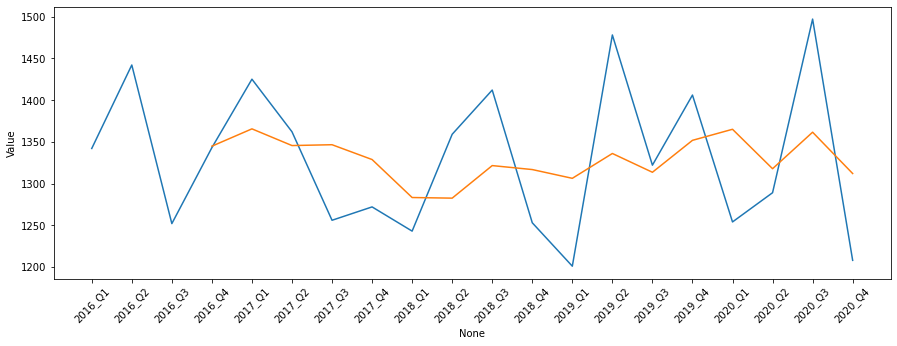

In [45]:
plt.figure(figsize=(15, 5))

sns.lineplot(
    data=new_df,
    x=new_df.index,
    y='Value'
)

sns.lineplot(
    data=new_df,
    x=new_df.index,
    y='smoothed_value'
)

plt.xticks(rotation=45)
plt.show()

In [52]:
from statsmodels.stats.diagnostic import acorr_ljungbox

res = new_df.iloc[3:, 1] - new_df.iloc[3:, 0]

# Box-Ljung 테스트 수행
test_result = acorr_ljungbox(res)
test_result

,lb_stat,lb_pvalue
1,0.815433,0.366519
2,3.871845,0.144291
3,4.141183,0.246617


In [55]:
# 2. 이중 이동평균 평활법(Double Moving Average Smoothing)
# 1. 단순 이동평균 평활법(Simple Moving Average Smoothing)
new_df['smoothed_value'] = new_df['Value'].rolling(3).mean()
new_df['smoothed_value2'] = new_df['smoothed_value'].rolling(3).mean()
new_df

,Value,smoothed_value,smoothed_value2
2016_Q1,1342,NaN,NaN
2016_Q2,1442,NaN,NaN
2016_Q3,1252,1345.333333,NaN
2016_Q4,1343,1345.666667,NaN
2017_Q1,1425,1340.000000,1343.666667
2017_Q2,1362,1376.666667,1354.111111
2017_Q3,1256,1347.666667,1354.777778
2017_Q4,1272,1296.666667,1340.333333
2018_Q1,1243,1257.000000,1300.444444
2018_Q2,1359,1291.333333,1281.666667


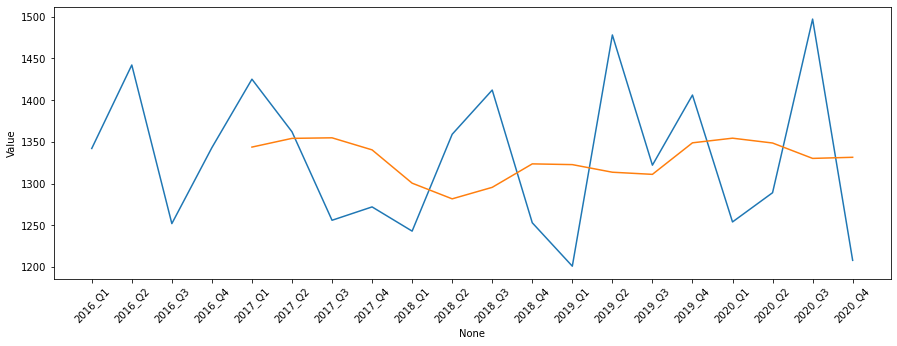

In [56]:
plt.figure(figsize=(15, 5))

sns.lineplot(
    data=new_df,
    x=new_df.index,
    y='Value'
)

sns.lineplot(
    data=new_df,
    x=new_df.index,
    y='smoothed_value2'
)

plt.xticks(rotation=45)
plt.show()

In [58]:
res = new_df.iloc[3:, 2] - new_df.iloc[3:, 0]

# Box-Ljung 테스트 수행
test_result = acorr_ljungbox(res, lags=[10])
test_result

,lb_stat,lb_pvalue
10,NaN,NaN


In [64]:
# 3. 가중 이동평균 평활법(Weighted Moving Average Smoothing)

# 가중치 정의
w1 = np.array([0.4, 0.3, 0.2, 0.1])

def weighted_moving_average(series, weights):
    result = np.full_like(series, np.nan, dtype=np.float64)
    for i in range(len(series)):
        if i+1 >= len(weights):
            result[i] = np.dot(series[i+1-len(weights):i+1], weights)

    return result

new_df['weighted_smoothed_value'] = new_df.apply(lambda x: weighted_moving_average(x, w1))['Value']
new_df

,Value,smoothed_value,smoothed_value2,weighted_smoothed_value
2016_Q1,1342,NaN,NaN,NaN
2016_Q2,1442,NaN,NaN,NaN
2016_Q3,1252,1345.333333,NaN,NaN
2016_Q4,1343,1345.666667,NaN,1354.1
2017_Q1,1425,1340.000000,1343.666667,1363.5
2017_Q2,1362,1376.666667,1354.111111,1324.9
2017_Q3,1256,1347.666667,1354.777778,1362.7
2017_Q4,1272,1296.666667,1340.333333,1357.0
2018_Q1,1243,1257.000000,1300.444444,1300.3
2018_Q2,1359,1291.333333,1281.666667,1268.5


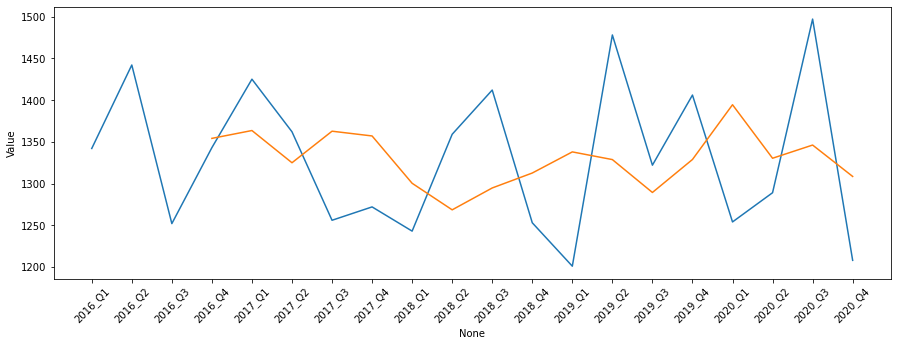

In [65]:
plt.figure(figsize=(15, 5))

sns.lineplot(
    data=new_df,
    x=new_df.index,
    y='Value'
)

sns.lineplot(
    data=new_df,
    x=new_df.index,
    y='weighted_smoothed_value'
)

plt.xticks(rotation=45)
plt.show()

In [67]:
res = new_df.iloc[3:, 3] - new_df.iloc[3:, 0]

# Box-Ljung 테스트 수행
test_result = acorr_ljungbox(res, lags=[10])
test_result

,lb_stat,lb_pvalue
10,16.173131,0.094782


## 5.3 요소분해 (Decomposition)
- **요소분해법**(Decomposition): 주어진 시계열 자료를 우연변동, 추세변동, 계절변동, 주기변동 등 다양한 변동의 중첩된 성분을 분해하는 기법

- 분해방법
  - 선형적으로 구성되는 가법모형(Additive)
  - 비선형적으로 구성되는 승법모형(Muliplicative)

- 중첩된 변동요인을 분해하는 목적은 시계열 자료에서 추세변동과 주기변동을 제거할 경우 남은 잔차(Residual) 시계열 자료를 우연변동에 의한 정상 시계열(Stationary Time Series)로 만들 수 있기 때문
  - 시계열 자료의 대부분은 추세변동과 주기변동을 제외할 경우 잔차 시계열은 정상 시계열이 됨
  - 잔차가 정상 시계열이 되지 않는 경우 보다 정밀한 추가 분석이 필요할 수 있음

- 시계열 성분 추출은 `decompose`를 이용하며 가법모형과 승법모형으로 구분
- 시계열 자료 y_t를 추세 및 주기변동(TC), 계절변동(S), 우연변동 (I) 등으로 구분하여 성분 추출
- 승법모형은 Log 변환으로 가법모형 변환 가능

  - 가법모형: y_t = TC_t + S_t + I_t
  - 승법모형: y_t = TC_t * S_t * I_t

In [70]:
# 기본 시계열 자료
data = np.array([1342, 1442, 1252, 1343,
                 1425, 1362, 1256, 1272,
                 1243, 1359, 1412, 1253,
                 1201, 1478, 1322, 1406,
                 1254, 1289, 1497, 1208]).reshape(5, 4)

df = pd.DataFrame(data, columns=['Q1', 'Q2', 'Q3', 'Q4'], index=['2016', '2017', '2018', '2019', '2020'])

df

,Q1,Q2,Q3,Q4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


In [80]:
# 계절변동 자료
data2 = np.array([1142, 1242, 1452, 1543,
                1125, 1262, 1456, 1572,
	            1143, 1259, 1412, 1553,
                1121, 1258, 1472, 1546,
                1154, 1249, 1477, 1548]).reshape(5, 4)

df2 = pd.DataFrame(data2, columns=['Q1', 'Q2', 'Q3', 'Q4'], index=['2016', '2017', '2018', '2019', '2020'])

df2

,Q1,Q2,Q3,Q4
2016,1142,1242,1452,1543
2017,1125,1262,1456,1572
2018,1143,1259,1412,1553
2019,1121,1258,1472,1546
2020,1154,1249,1477,1548


In [81]:
# 계절추세변동 자료
data4 = np.array([1142, 1242, 1452, 1543,
                1225, 1362, 1556, 1672,
	            1343, 1459, 1662, 1753,
                1421, 1558, 1772, 1846,
                1554, 1649, 1877, 1948]).reshape(5, 4)

df4 = pd.DataFrame(data4, columns=['Q1', 'Q2', 'Q3', 'Q4'], index=['2016', '2017', '2018', '2019', '2020'])

df4

,Q1,Q2,Q3,Q4
2016,1142,1242,1452,1543
2017,1225,1362,1556,1672
2018,1343,1459,1662,1753
2019,1421,1558,1772,1846
2020,1554,1649,1877,1948


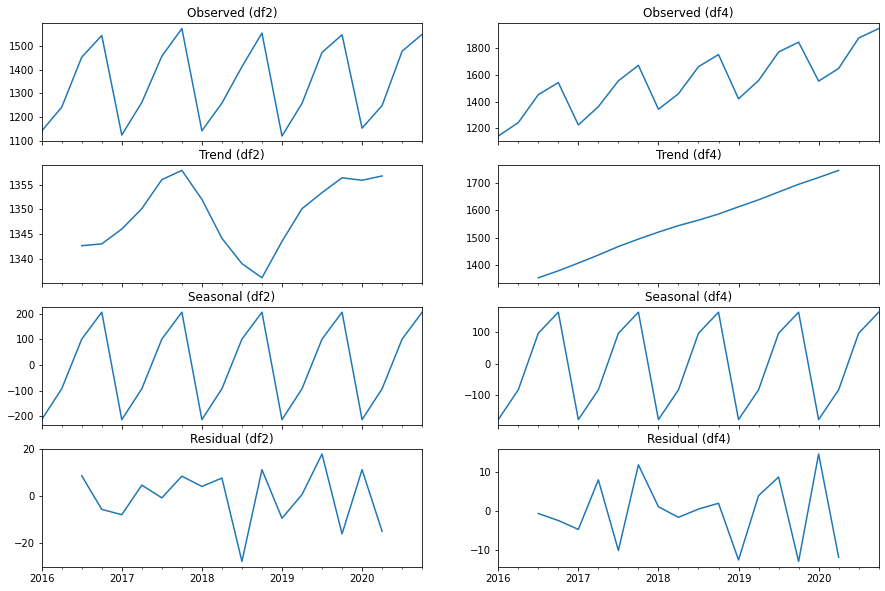

In [82]:
# 1. 가법모형
from statsmodels.tsa.seasonal import seasonal_decompose

df2 = df2.stack()
df4 = df4.stack()

df2.index = pd.date_range(start='2016Q1', periods=len(df2), freq='Q')
df4.index = pd.date_range(start='2016Q1', periods=len(df4), freq='Q')

# 시계열 데이터 분해
decompose_result_additive_dd2 = seasonal_decompose(df2, model='additive')
decompose_result_additive_dd4 = seasonal_decompose(df4, model='additive')

# 분해된 시계열 데이터 시각화
fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharex=True)

decompose_result_additive_dd2.observed.plot(ax=axes[0, 0], title='Observed (df2)')
decompose_result_additive_dd2.trend.plot(ax=axes[1, 0], title='Trend (df2)')
decompose_result_additive_dd2.seasonal.plot(ax=axes[2, 0], title='Seasonal (df2)')
decompose_result_additive_dd2.resid.plot(ax=axes[3, 0], title='Residual (df2)')

decompose_result_additive_dd4.observed.plot(ax=axes[0, 1], title='Observed (df4)')
decompose_result_additive_dd4.trend.plot(ax=axes[1, 1], title='Trend (df4)')
decompose_result_additive_dd4.seasonal.plot(ax=axes[2, 1], title='Seasonal (df4)')
decompose_result_additive_dd4.resid.plot(ax=axes[3, 1], title='Residual (df4)')

plt.show()

In [94]:
# 계절 추세 변동 시계열 요소분해 분석결과
origin_df4 = decompose_result_additive_dd4.observed
trend_df4 = decompose_result_additive_dd4.trend
seasonal_df4 = decompose_result_additive_dd4.seasonal
resid_df4 = decompose_result_additive_dd4.resid

decompose_df4 = pd.concat([origin_df4, trend_df4, seasonal_df4, resid_df4], axis=1).rename(columns={0:'origin'})
decompose_df4

,origin,trend,seasonal,resid
2016-03-31,1142.0,NaN,-178.851562,NaN
2016-06-30,1242.0,NaN,-83.539062,NaN
2016-09-30,1452.0,1355.125,97.492188,-0.617188
2016-12-31,1543.0,1380.500,164.898438,-2.398438
2017-03-31,1225.0,1408.500,-178.851562,-4.648438
2017-06-30,1362.0,1437.625,-83.539062,7.914062
2017-09-30,1556.0,1468.500,97.492188,-9.992188
2017-12-31,1672.0,1495.375,164.898438,11.726562
2018-03-31,1343.0,1520.750,-178.851562,1.101562
2018-06-30,1459.0,1544.125,-83.539062,-1.585938


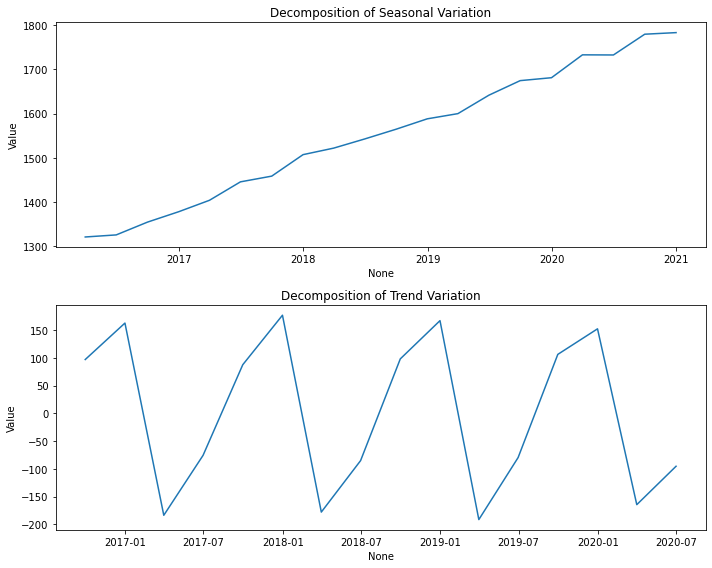

In [95]:
# 원본 시계열 - 계절변동 제거
decompose_df4['seasonal_diff'] = decompose_df4['origin'] - decompose_df4['seasonal']

# 원본 시계열 - 추세변동 제거
decompose_df4['trend_diff'] = decompose_df4['origin'] - decompose_df4['trend']

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.lineplot(data=decompose_df4, x=decompose_df4.index, y='seasonal_diff', ax=axes[0])
axes[0].set_title('Decomposition of Seasonal Variation')
axes[0].set_ylabel('Value')

sns.lineplot(data=decompose_df4, x=decompose_df4.index, y='trend_diff', ax=axes[1])
axes[1].set_title('Decomposition of Trend Variation')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

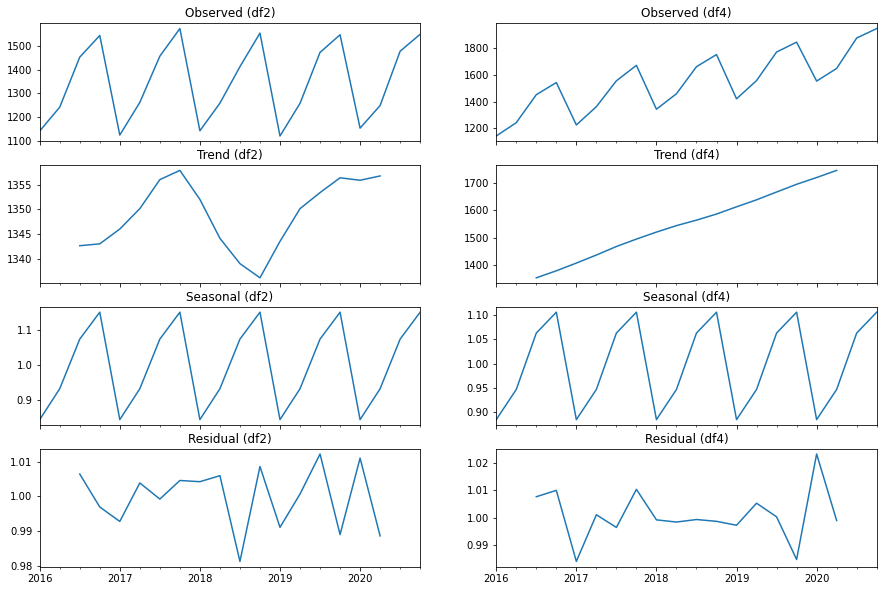

In [97]:
# 2. 승법모형
df2.index = pd.date_range(start='2016Q1', periods=len(df2), freq='Q')
df4.index = pd.date_range(start='2016Q1', periods=len(df4), freq='Q')

# 시계열 데이터 분해
decompose_result_additive_dd2 = seasonal_decompose(df2, model='multiplicative')
decompose_result_additive_dd4 = seasonal_decompose(df4, model='multiplicative')

# 분해된 시계열 데이터 시각화
fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharex=True)

decompose_result_additive_dd2.observed.plot(ax=axes[0, 0], title='Observed (df2)')
decompose_result_additive_dd2.trend.plot(ax=axes[1, 0], title='Trend (df2)')
decompose_result_additive_dd2.seasonal.plot(ax=axes[2, 0], title='Seasonal (df2)')
decompose_result_additive_dd2.resid.plot(ax=axes[3, 0], title='Residual (df2)')

decompose_result_additive_dd4.observed.plot(ax=axes[0, 1], title='Observed (df4)')
decompose_result_additive_dd4.trend.plot(ax=axes[1, 1], title='Trend (df4)')
decompose_result_additive_dd4.seasonal.plot(ax=axes[2, 1], title='Seasonal (df4)')
decompose_result_additive_dd4.resid.plot(ax=axes[3, 1], title='Residual (df4)')

plt.show()

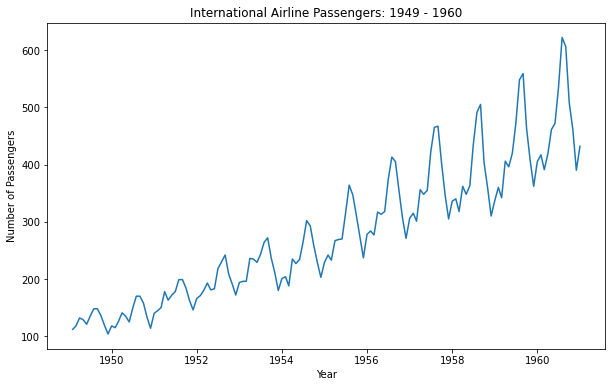

In [102]:
# airpass 데이터 decompose
airpass_df = sm.datasets.get_rdataset("AirPassengers").data
airpass_df['time'] = pd.date_range(start='1949-01', periods=len(airpass_df), freq='M')
airpass_df.set_index('time', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(airpass_df.index, airpass_df['value'])

plt.title('International Airline Passengers: 1949 - 1960')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

plt.show()

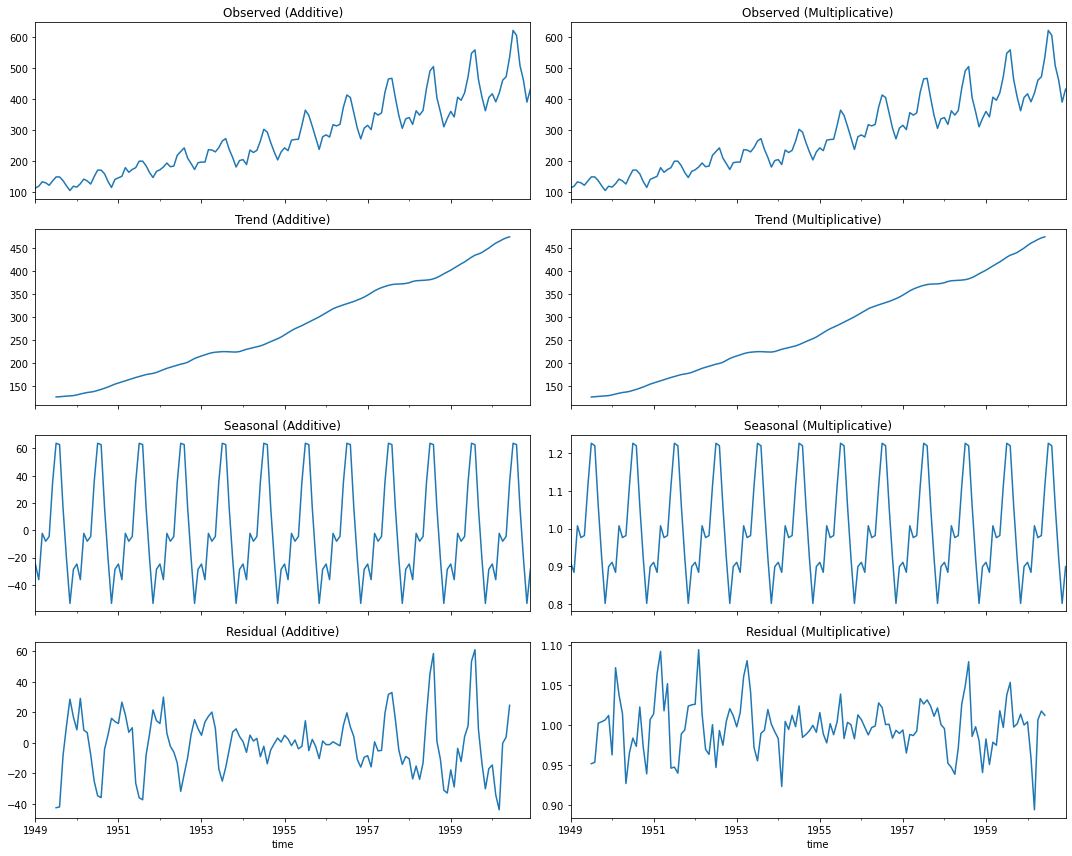

In [106]:
# 가법모형 분해
decompose_result_additive = seasonal_decompose(airpass_df, model='additive', period=12)

# 승법모형 분해
decompose_result_multiplicative = seasonal_decompose(airpass_df, model='multiplicative', period=12)

# 분해된 시계열 데이터 플로팅
fig, axes = plt.subplots(4, 2, figsize=(15, 12), sharex=True)

# 가법모형 플로팅
decompose_result_additive.observed.plot(ax=axes[0, 0], title='Observed (Additive)')
decompose_result_additive.trend.plot(ax=axes[1, 0], title='Trend (Additive)')
decompose_result_additive.seasonal.plot(ax=axes[2, 0], title='Seasonal (Additive)')
decompose_result_additive.resid.plot(ax=axes[3, 0], title='Residual (Additive)')

# 승법모형 플로팅
decompose_result_multiplicative.observed.plot(ax=axes[0, 1], title='Observed (Multiplicative)')
decompose_result_multiplicative.trend.plot(ax=axes[1, 1], title='Trend (Multiplicative)')
decompose_result_multiplicative.seasonal.plot(ax=axes[2, 1], title='Seasonal (Multiplicative)')
decompose_result_multiplicative.resid.plot(ax=axes[3, 1], title='Residual (Multiplicative)')

plt.tight_layout()
plt.show()

In [104]:
# 계절 추세 변동 시계열 요소분해 분석결과
origin_df4 = decompose_result_multiplicative.observed
trend_df4 = decompose_result_multiplicative.trend
seasonal_df4 = decompose_result_multiplicative.seasonal
resid_df4 = decompose_result_multiplicative.resid

decompose_airpass_df = pd.concat([origin_df4, trend_df4, seasonal_df4, resid_df4], axis=1).rename(columns={0:'origin'})
decompose_airpass_df

,origin,trend,seasonal,resid
time,,,,
1949-01-31,112.0,NaN,0.910230,NaN
1949-02-28,118.0,NaN,0.883625,NaN
1949-03-31,132.0,NaN,1.007366,NaN
1949-04-30,129.0,NaN,0.975906,NaN
1949-05-31,121.0,NaN,0.981378,NaN
...,...,...,...,...
1960-08-31,606.0,NaN,1.219911,NaN
1960-09-30,508.0,NaN,1.060492,NaN
1960-10-31,461.0,NaN,0.921757,NaN


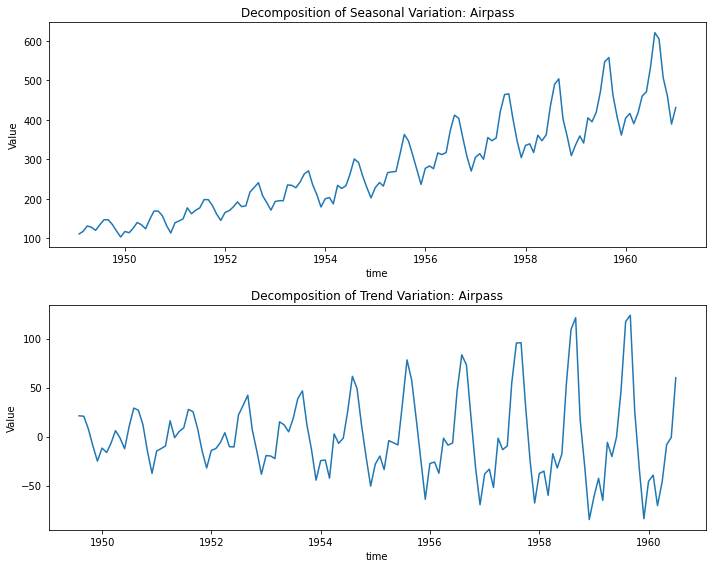

In [113]:
# 원본 시계열 - 계절변동 제거
decompose_airpass_df['seasonal_diff'] = decompose_airpass_df['origin'] - decompose_airpass_df['seasonal']

# 원본 시계열 - 추세변동 제거
decompose_airpass_df['trend_diff'] = decompose_airpass_df['origin'] - decompose_airpass_df['trend']

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.lineplot(data=decompose_airpass_df, x=decompose_airpass_df.index, y='seasonal_diff', ax=axes[0])
axes[0].set_title('Decomposition of Seasonal Variation: Airpass')
axes[0].set_ylabel('Value')

sns.lineplot(data=decompose_airpass_df, x=decompose_airpass_df.index, y='trend_diff', ax=axes[1])
axes[1].set_title('Decomposition of Trend Variation: Airpass')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()